# Problem definition :

Machine learning model that predicts student academic performance based on attendance, study hours, and past exam scores.

# Step 1: Load and Preprocess Data

In [18]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load the data
df=pd.read_csv("ResearchInformation3.csv")

In [3]:
# extract the some rows in data for understanding
df.head(4)

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750


# Step 2: Preprocess the Data

In [4]:
# Check for missing values
print(df.isnull().sum())

Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Last           0
Overall        0
dtype: int64


In [5]:
df.columns

Index(['Department', 'Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer',
       'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra',
       'Semester', 'Last', 'Overall'],
      dtype='object')

In [22]:
df.shape

(493, 17)

# Step 2: Create Target Column (Label): We convert the Overall GPA to categories: Good, Average, Poor

In [6]:
def categorize_gpa(gpa):
    if gpa >= 3.5:
        return 'Good'
    elif gpa >= 2.5:
        return 'Average'
    else:
        return 'Poor'

df['Performance'] = df['Overall'].apply(categorize_gpa)

# Step 3: Encode Categorical Columns

In [7]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Define Features and Labels

In [8]:
X = df.drop(['Overall', 'Last', 'Performance'], axis=1)  # drop target & correlated column
y = df['Performance']

#  Step 5: Split Data & Scale

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 # Step 6: Train the Model

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 7: Evaluate the Model

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7171717171717171

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70        50
           1       0.76      0.82      0.79        39
           2       0.46      0.60      0.52        10

    accuracy                           0.72        99
   macro avg       0.66      0.69      0.67        99
weighted avg       0.73      0.72      0.72        99


Confusion Matrix:
 [[33 10  7]
 [ 7 32  0]
 [ 4  0  6]]


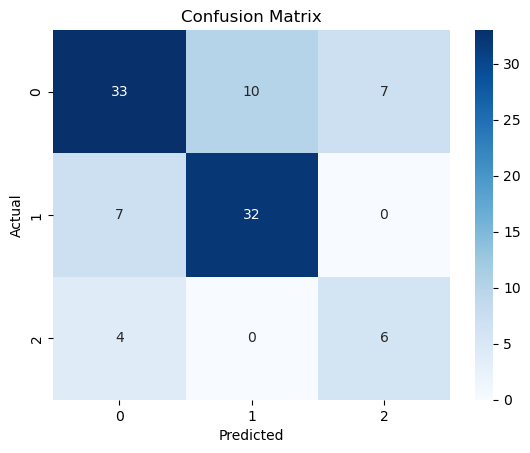

In [19]:
# Visualization confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Assuming y_test and y_pred are already defined
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # use 'macro' or 'weighted' depending on use case
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Accuracy:  0.72
Precision: 0.73
Recall:    0.72
F1 Score:  0.72


# Step 8: Save the Model for Deployment

In [21]:
import joblib

# Save model and scaler
joblib.dump(model, 'student_performance_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(df.columns.tolist(), 'feature_order.pkl')

['feature_order.pkl']